# **Process the raw data**

The raw training images are 4D, here change it to 3D

In [ ]:
import tifffile
import numpy as np
import os

tif_file_list = os.listdir('data/tiff_raw_data/')

if not os.path.exists('data/tiff_data/'):
    os.mkdir('data/tiff_data/')

for tif_file in tif_file_list:
    img = tifffile.imread('data/tiff_raw_data/' + tif_file)
    # print(img.shape)
    img = img.squeeze()
    # print(img.shape)
    tifffile.imwrite('data/tiff_data/' + tif_file, img)
    print(tif_file)


# **Get Mask through Cellpose**

In [ ]:
import os
import numpy as np

from cellpose import models, io

In [ ]:
file_list = os.listdir('data/Fluo-C2DL-Huh7/02')

if not os.path.exists('data/Fluo_mask_data'):
    os.mkdir('data/Fluo_mask_data')

model = models.Cellpose(gpu=True, model_type='cyto')

for file in file_list:
    if file.endswith('.tif'):
        print(file)
        
        img = io.imread('data/Fluo-C2DL-Huh7/02/' + file)
        print(img.shape)
        break
        masks, flows, styles, diams = model.eval(img, diameter=30, channels=[0,0])
        np.save('data/Fluo_mask_data/' + '02' + file[:-4] + '_mask.npy', masks)

t000.tif
(1024, 1024)


# **Generate single cell training data with mask**

In [ ]:
import os
import numpy as np

import matplotlib.pyplot as plt

import cv2
import tifffile

In [ ]:
data_path = 'data/tiff_data/'
file_list = os.listdir(data_path)
mask_path = 'data/tiff_mask_data/'
save_path = 'data/single_cell_data_with_mask/'

bias = 3

if not os.path.exists(save_path):
    os.makedirs(save_path)

for file in file_list:
    filename = file.split('.')[0]
    print('Processing ' + file + '...')
    img = tifffile.imread(data_path + file)
    # print(img.shape)
    img = np.transpose(img, (2, 1, 0))
    mask = np.load(mask_path + '/' + filename + '_mask.npy')
    mask = np.transpose(mask, (1, 0))
    num_cells = np.max(mask.flatten())
    # plt.subplot(1, 2, 1)
    # plt.imshow(img[0], cmap='gray')
    # plt.subplot(1, 2, 2)
    # plt.imshow(mask, cmap='gray')
    # plt.show()
    # print(min(mask.flatten()), max(mask.flatten()))
    print('Number of cells in ' + file + ': ' + str(num_cells))
    # break
    for i in range(1, num_cells + 1):
        cell_index = np.argwhere(mask == i)
        # print(cell_index.shape)
        x, y = cell_index[:, 1], cell_index[:, 0]
        x_min, x_max = np.min(x), np.max(x)
        y_min, y_max = np.min(y), np.max(y)
        # print(x_min, x_max, y_min, y_max)
        if x_min < bias or x_max > img.shape[1] - bias or y_min < bias or y_max > img.shape[2] - bias:
            print('Cell ' + str(i) + ' in ' + file + ' is too close to the edge!')
            continue
        cell = img[:, y_min-bias:y_max+bias, x_min-bias:x_max+bias]
        # if i == 2:
        #     plt.subplot(1, 2, 1)
        #     plt.imshow(img.)
            # print(cell.shape)
        if (np.count_nonzero(cell[0]) / (cell.shape[1]*cell.shape[2])) < 0.5:
            print('Empty cell!')
            continue
        tifffile.imsave(save_path + filename + '_' + str(i) + '.tif', cell)
        mask_cell = np.zeros(mask.shape)
        # print(cell_index.shape, mask_cell.shape)
        mask_cell[mask == i] = 1
        mask_cell = mask_cell[y_min-bias:y_max+bias, x_min-bias:x_max+bias]
        # mask_cell[mask_cell != i] = 0
        mask_cell = mask_cell.astype(np.uint8)
        tifffile.imsave(save_path + filename + '_' + str(i) + '_mask.tif', mask_cell)
        print('Cell ' + str(i) + ' in ' + file + ' saved!')
        # if i == 15:
        #     # print(cell.shape, mask_cell.shape)
        #     # print(mask_cell[:, :])
        #     plt.subplot(1, 2, 1)
        #     plt.imshow(cell[0])
        #     plt.subplot(1, 2, 2)
        #     plt.imshow(mask_cell[:, :])
        #     plt.show()
    #         break
    # break
        # np.save(save_path + '/' + filename + '_' + str(i) + '.npy', cell)

Processing 0.tif...
Number of cells in 0.tif: 158
Cell 1 in 0.tif is too close to the edge!
Cell 2 in 0.tif saved!
Cell 3 in 0.tif saved!
Cell 4 in 0.tif saved!
Cell 5 in 0.tif saved!
Cell 6 in 0.tif saved!
Cell 7 in 0.tif saved!
Cell 8 in 0.tif saved!
Cell 9 in 0.tif saved!
Cell 10 in 0.tif saved!
Cell 11 in 0.tif saved!
Cell 12 in 0.tif saved!
Cell 13 in 0.tif saved!
Cell 14 in 0.tif saved!
Cell 15 in 0.tif saved!
Cell 16 in 0.tif saved!
Cell 17 in 0.tif saved!
Cell 18 in 0.tif saved!
Cell 19 in 0.tif saved!
Cell 20 in 0.tif saved!
Cell 21 in 0.tif saved!
Cell 22 in 0.tif saved!
Cell 23 in 0.tif saved!
Cell 24 in 0.tif saved!
Cell 25 in 0.tif saved!
Cell 26 in 0.tif saved!
Cell 27 in 0.tif saved!
Cell 28 in 0.tif saved!
Cell 29 in 0.tif saved!
Cell 30 in 0.tif saved!
Cell 31 in 0.tif saved!
Cell 32 in 0.tif saved!
Cell 33 in 0.tif saved!
Cell 34 in 0.tif saved!
Cell 35 in 0.tif saved!


C:\Users\hx57\AppData\Local\Temp\ipykernel_29556\1989504745.py:46: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(save_path + filename + '_' + str(i) + '.tif', cell)
C:\Users\hx57\AppData\Local\Temp\ipykernel_29556\1989504745.py:53: DeprecationWarning: <tifffile.imsave> is deprecated. Use tifffile.imwrite
  tifffile.imsave(save_path + filename + '_' + str(i) + '_mask.tif', mask_cell)


Cell 36 in 0.tif saved!
Cell 37 in 0.tif saved!
Cell 38 in 0.tif saved!
Cell 39 in 0.tif saved!
Cell 40 in 0.tif saved!
Cell 41 in 0.tif saved!
Cell 42 in 0.tif saved!
Cell 43 in 0.tif saved!
Cell 44 in 0.tif saved!
Cell 45 in 0.tif saved!
Cell 46 in 0.tif saved!
Cell 47 in 0.tif saved!
Cell 48 in 0.tif saved!
Cell 49 in 0.tif saved!
Cell 50 in 0.tif saved!
Cell 51 in 0.tif saved!
Cell 52 in 0.tif saved!
Cell 53 in 0.tif saved!
Cell 54 in 0.tif saved!
Cell 55 in 0.tif saved!
Cell 56 in 0.tif saved!
Cell 57 in 0.tif saved!
Cell 58 in 0.tif saved!
Cell 59 in 0.tif saved!
Cell 60 in 0.tif saved!
Cell 61 in 0.tif saved!
Cell 62 in 0.tif saved!
Cell 63 in 0.tif saved!
Cell 64 in 0.tif saved!
Cell 65 in 0.tif saved!
Cell 66 in 0.tif saved!
Cell 67 in 0.tif saved!
Cell 68 in 0.tif saved!
Cell 69 in 0.tif saved!
Cell 70 in 0.tif saved!
Cell 71 in 0.tif saved!
Cell 72 in 0.tif saved!
Cell 73 in 0.tif saved!
Cell 74 in 0.tif saved!
Cell 75 in 0.tif saved!
Cell 76 in 0.tif saved!
Cell 77 in 0.tif

# **Calculate mean and std of dataset**

In [1]:
import os
import tifffile
import numpy as np

import matplotlib.pyplot as plt

data_path = 'data/single_cell_data/'

In [ ]:
file_list = os.listdir(data_path)

# mean_tmpt, std_tmpt = [], []
# mean, std = [], []

# for i in range(4):
#     for file in file_list:
#         if file.endswith('.tif'):
#             img = tifffile.imread(data_path + file)
#             mean_tmpt.append(np.mean(img[i]))
#             std_tmpt.append(np.std(img[i]))
#     mean.append(np.mean(mean_tmpt))
#     std.append(np.mean(std_tmpt))
#     mean_tmpt, std_tmpt = [], []

# print(mean)
# print(std)

[6076.685883679818, 1350.9691095158794, 5090.145564947434, 5019.978020658786]
[5504.395544161098, 1145.6356702621574, 663.3312283427825, 706.0040270727409]


In [3]:
mean = np.array([6076.685883679818, 1350.9691095158794, 5090.145564947434, 5019.978020658786])
std = np.array([5504.395544161098, 1145.6356702621574, 663.3312283427825, 706.0040270727409])

(4, 20, 18)


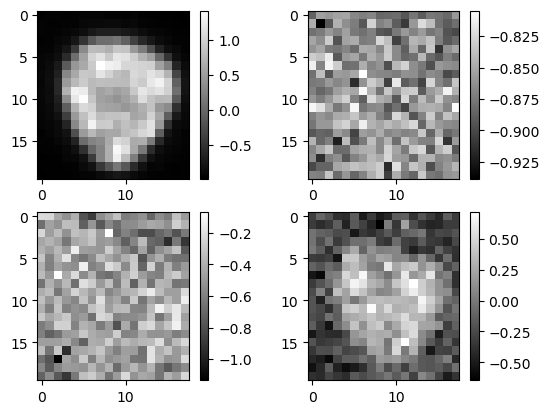

In [4]:
data_path = 'data/single_cell_data/'

file_list = os.listdir(data_path)

idx = 25

img = tifffile.imread(data_path + file_list[idx])
print(img.shape)

img = img.astype(np.float32)

for i in range(4):
    img[i] = (img[i] - mean[i]) / std[i]
# img = (img - mean) / std


fig = plt.figure()
plt.subplot(2, 2, 1)
plt.imshow(img[0], cmap='gray')
plt.colorbar()
plt.subplot(2, 2, 2)
plt.imshow(img[1], cmap='gray')
plt.colorbar()
plt.subplot(2, 2, 3)
plt.imshow(img[2], cmap='gray')
plt.colorbar()
plt.subplot(2, 2, 4)
plt.imshow(img[3], cmap='gray')
plt.colorbar()
plt.show()